First Algorithm RBF SVM

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [13]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf = SVC(kernel='rbf', random_state=0)
svm_rbf.fit(X_train_scaled, y_train)

y_pred = svm_rbf.predict(X_test_scaled)



In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RBF SVM: {accuracy:.2f}")

Accuracy of RBF SVM: 0.73


In [16]:
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [17]:
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

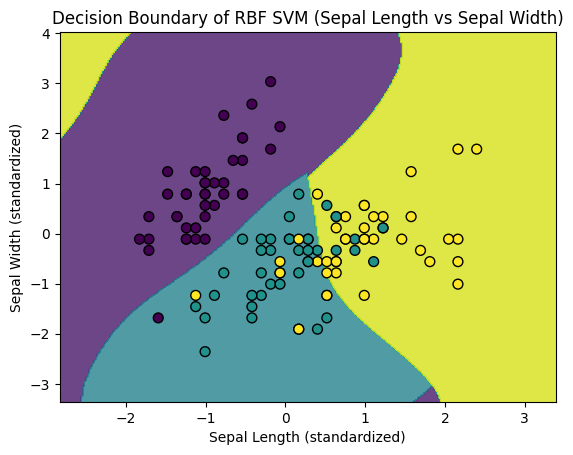

In [18]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.title("Decision Boundary of RBF SVM (Sepal Length vs Sepal Width)")
plt.show()